In [1]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import statistics

plt.rcParams["font.family"] = "Helvetica Neue"

The following cell will establish an empty dataframe into which we can record our data. There are 5 lines to test, each with 3 runs.

In [8]:
df = pd.read_csv('data.csv')
df.head(10)

,line,run,n,B
0,1,1,0.00,0.0
1,1,1,0.25,1.0
2,1,1,0.50,2.0
3,1,2,0.00,0.0
4,1,2,0.25,2.0
5,1,2,0.50,4.0
6,1,3,0.00,0.0
7,1,3,0.25,3.0
8,1,3,0.50,6.0
9,2,1,0.00,0.0


In [4]:
def linear(x, m, b):
    return m * x + b

def get_fit_line_params(df, line, run):
    df_filtered = df[(df['line'] == line) & (df['run'] == run)]
    popt, pcov = optimize.curve_fit(
        linear,
        xdata=df_filtered['n'],
        ydata=df_filtered['B']
    )
    return popt, pcov

In [5]:
# Constants for getting g-factor
h = 6.62607015e-34 # J*s, Planck's constant
c = 3e8 # m/s, speed of light
l = 9.995e-3 # m, FPI width
nu_f = c / (2 * l) # Hz, free spectral range
mu_B = 9.274009994e-24  # J/T, Bohr magneton

def get_g_factor(df, line, run):
    popt, _ = get_fit_line_params(df, line, run)
    slope = popt[0]
    g_factor = (h * nu_f) / (slope * mu_B)
    return g_factor

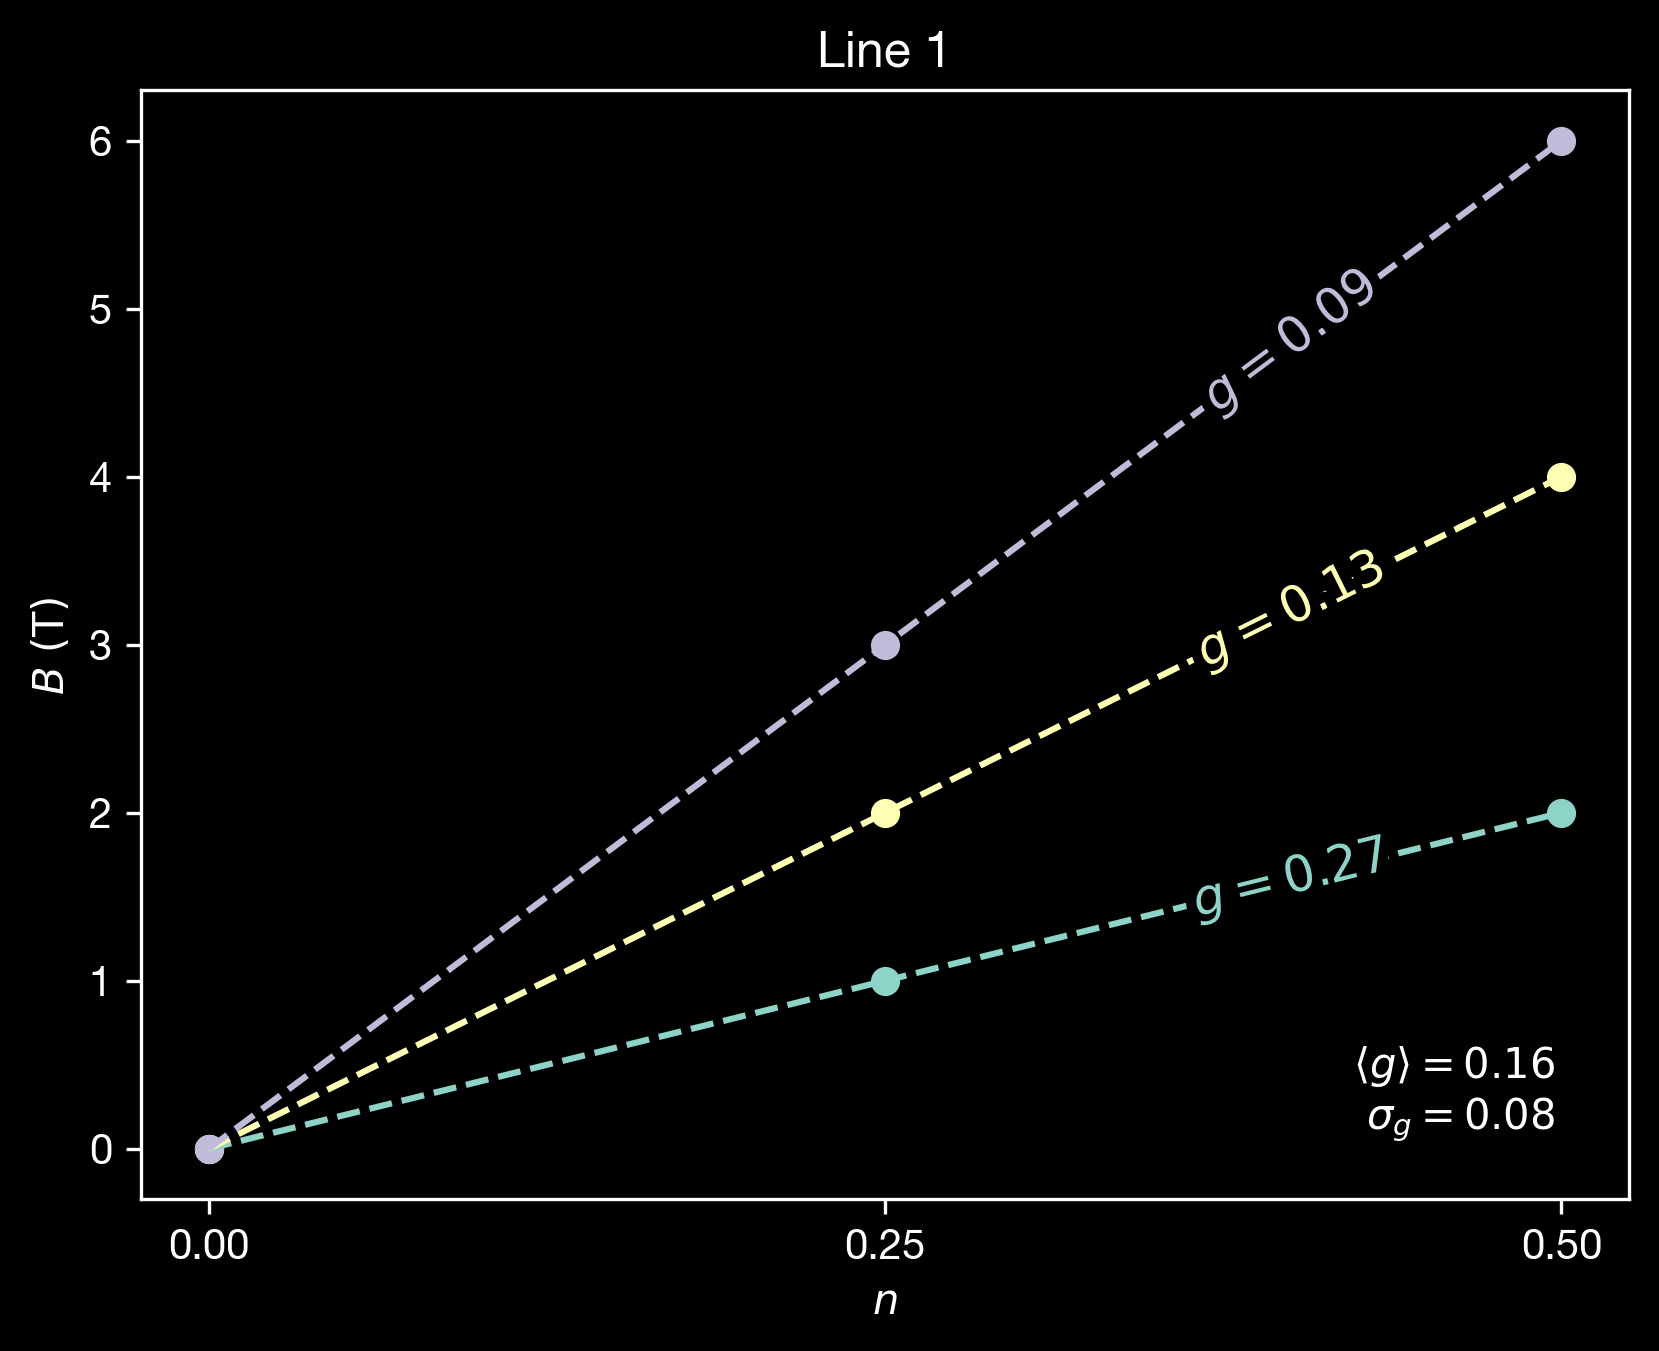

/var/folders/69/b04kj0ls1jz_lb6g_l79x1tw0000gn/T/ipykernel_32593/1942275200.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  g_factor = (h * nu_f) / (slope * mu_B)
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


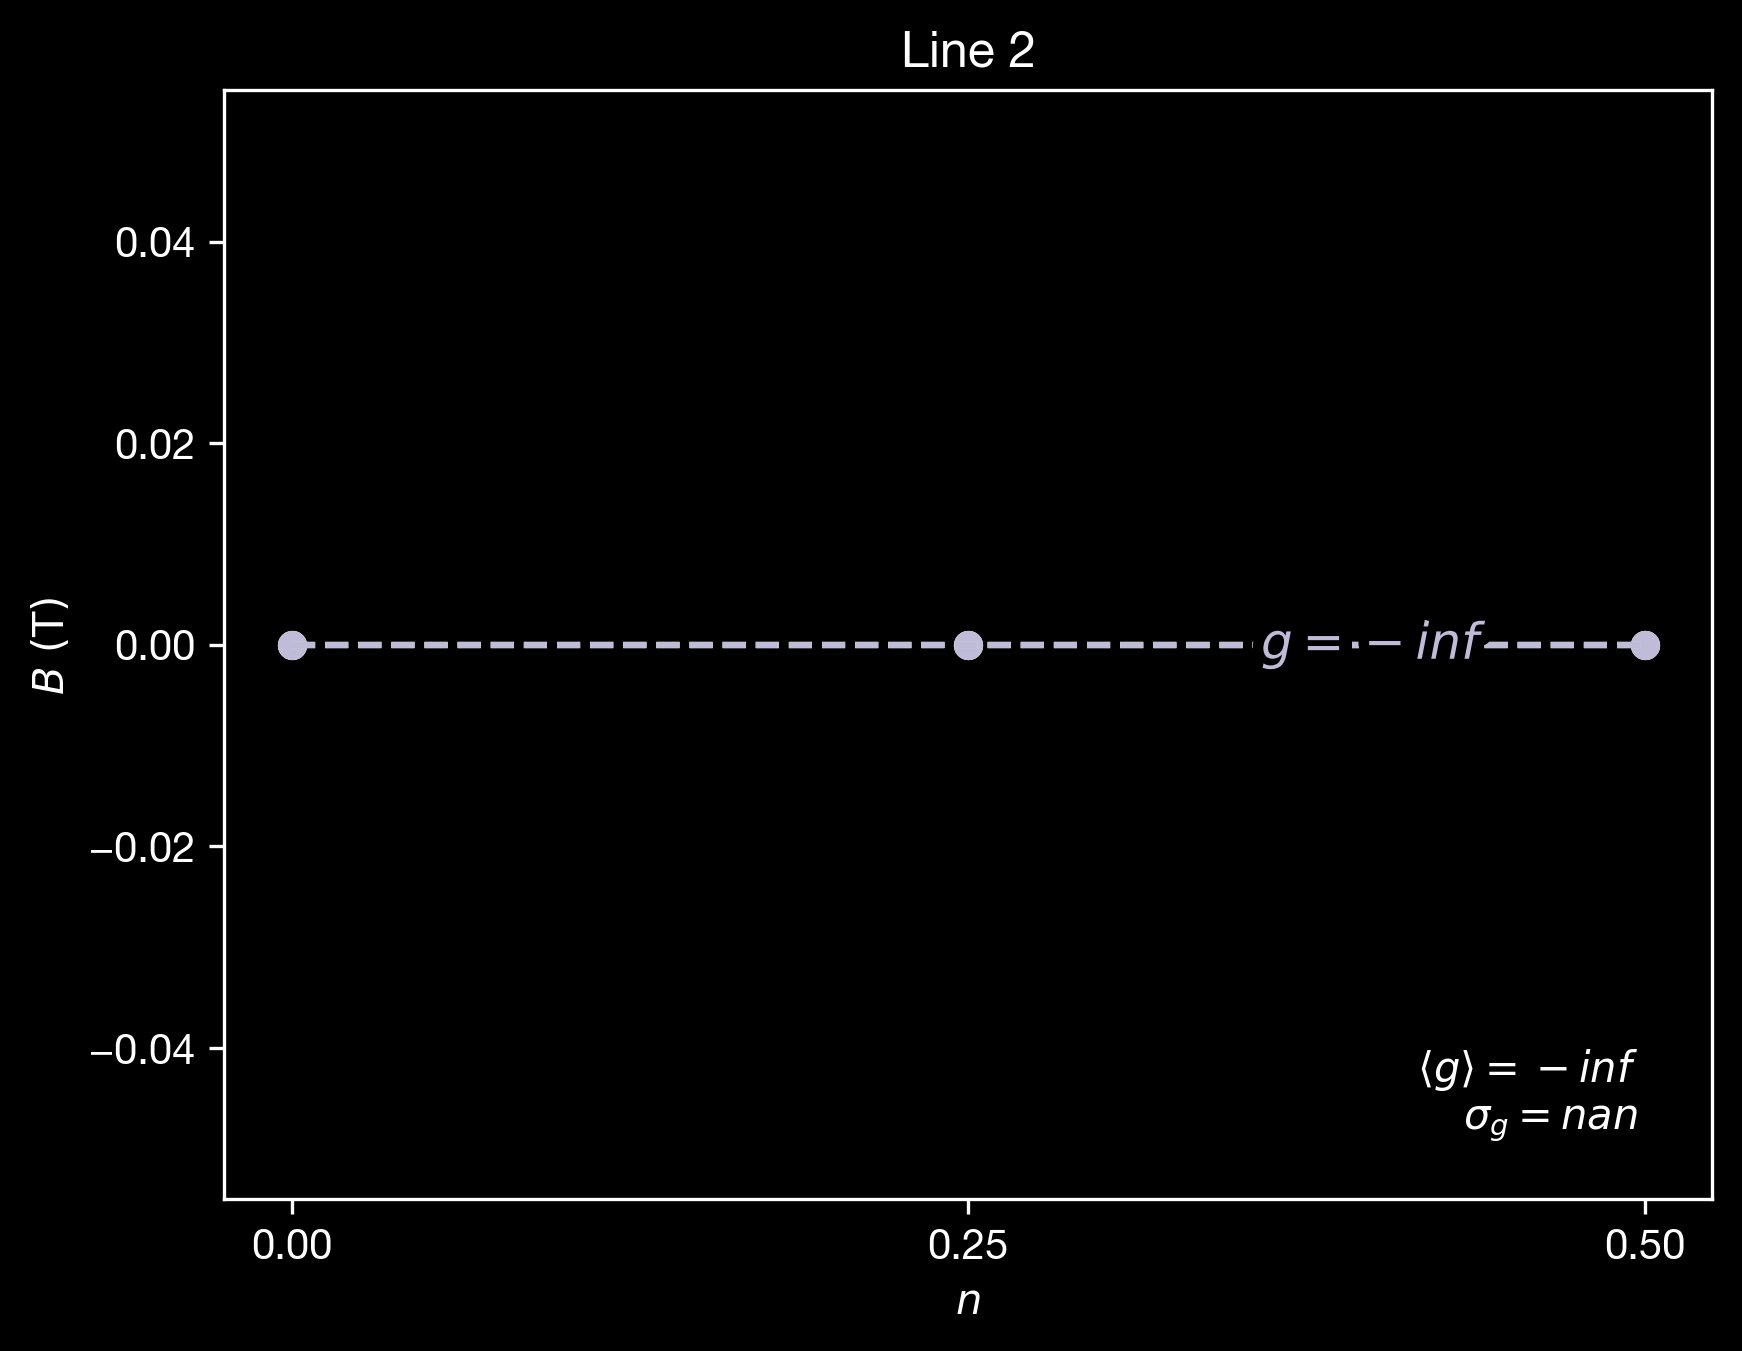

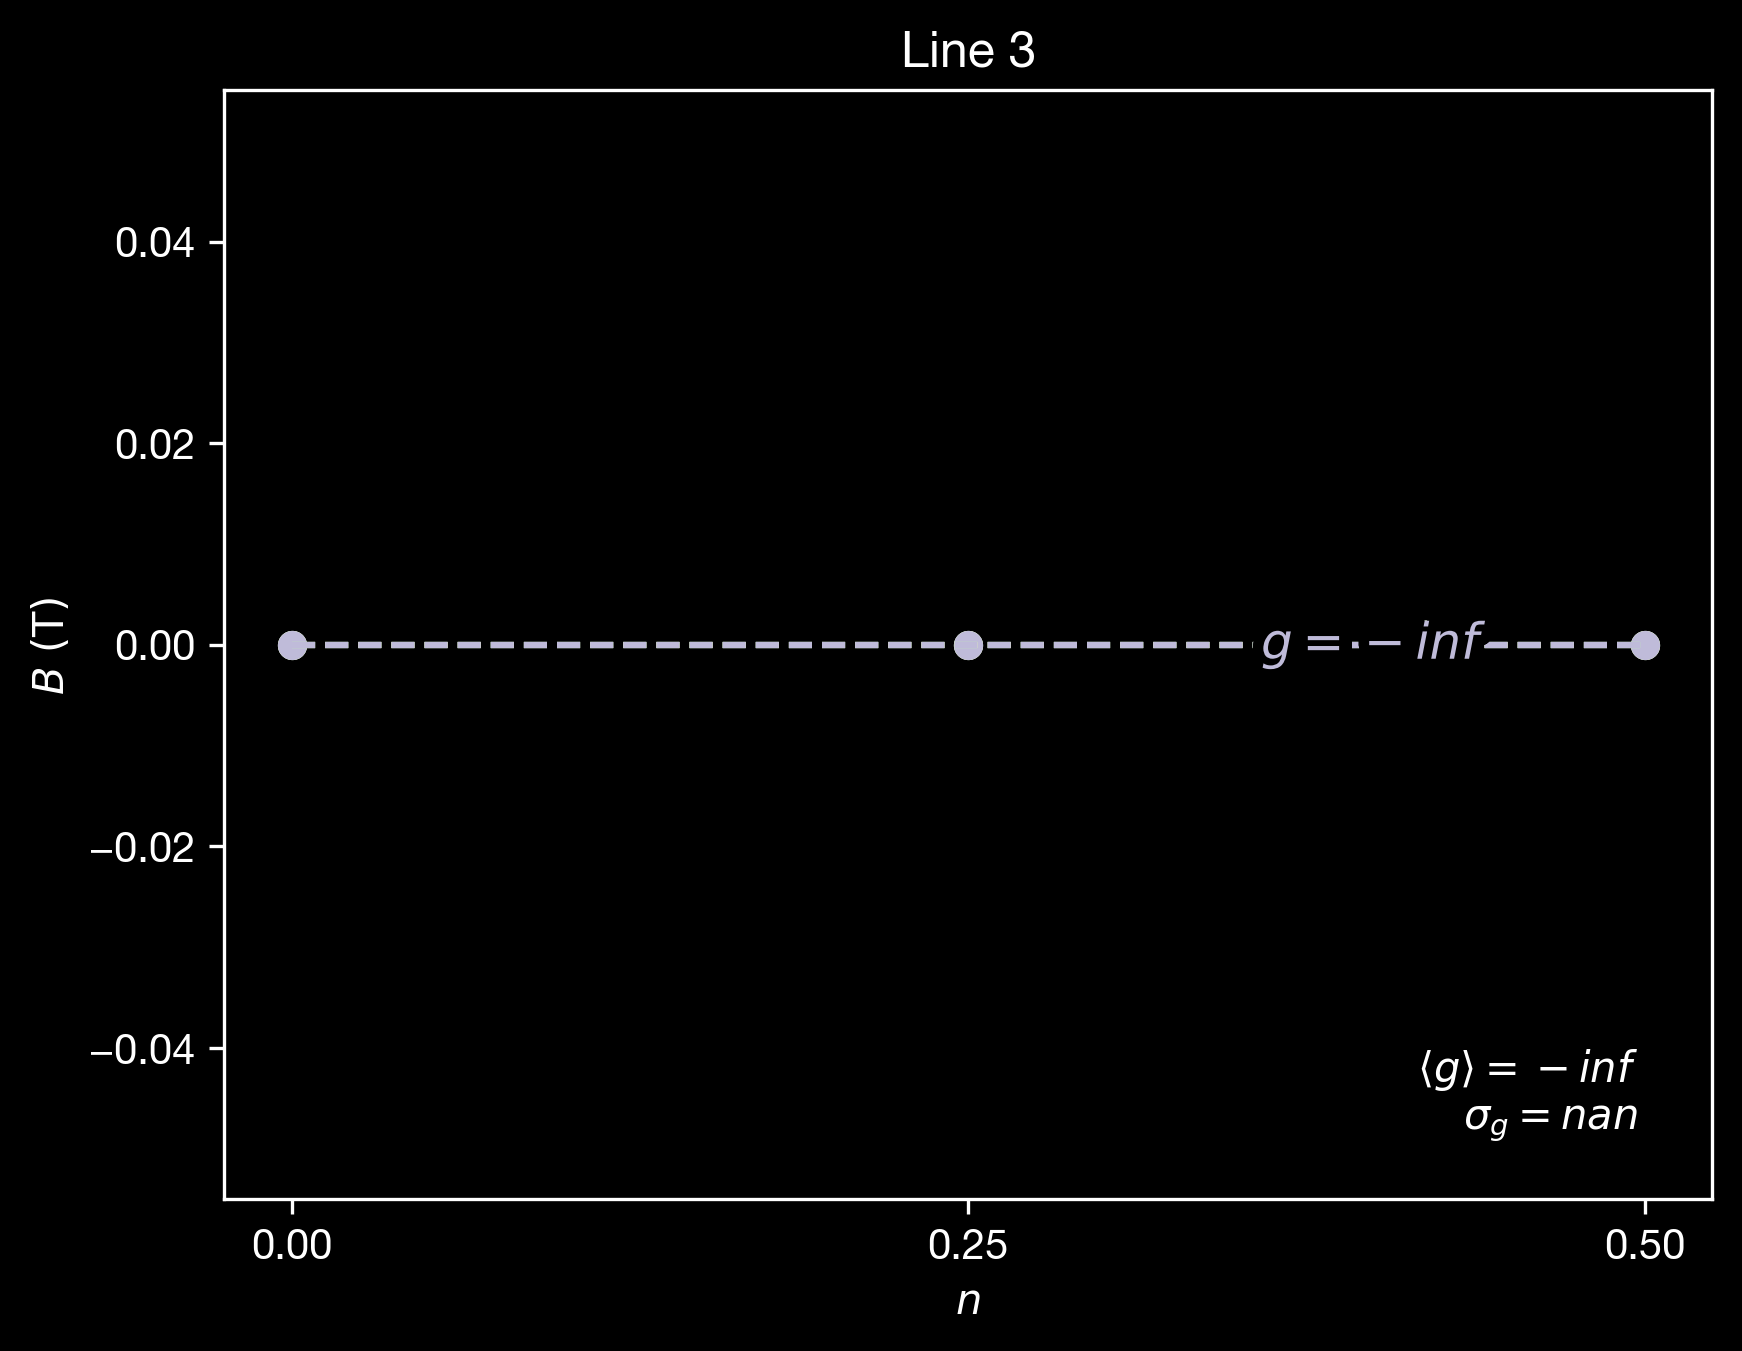

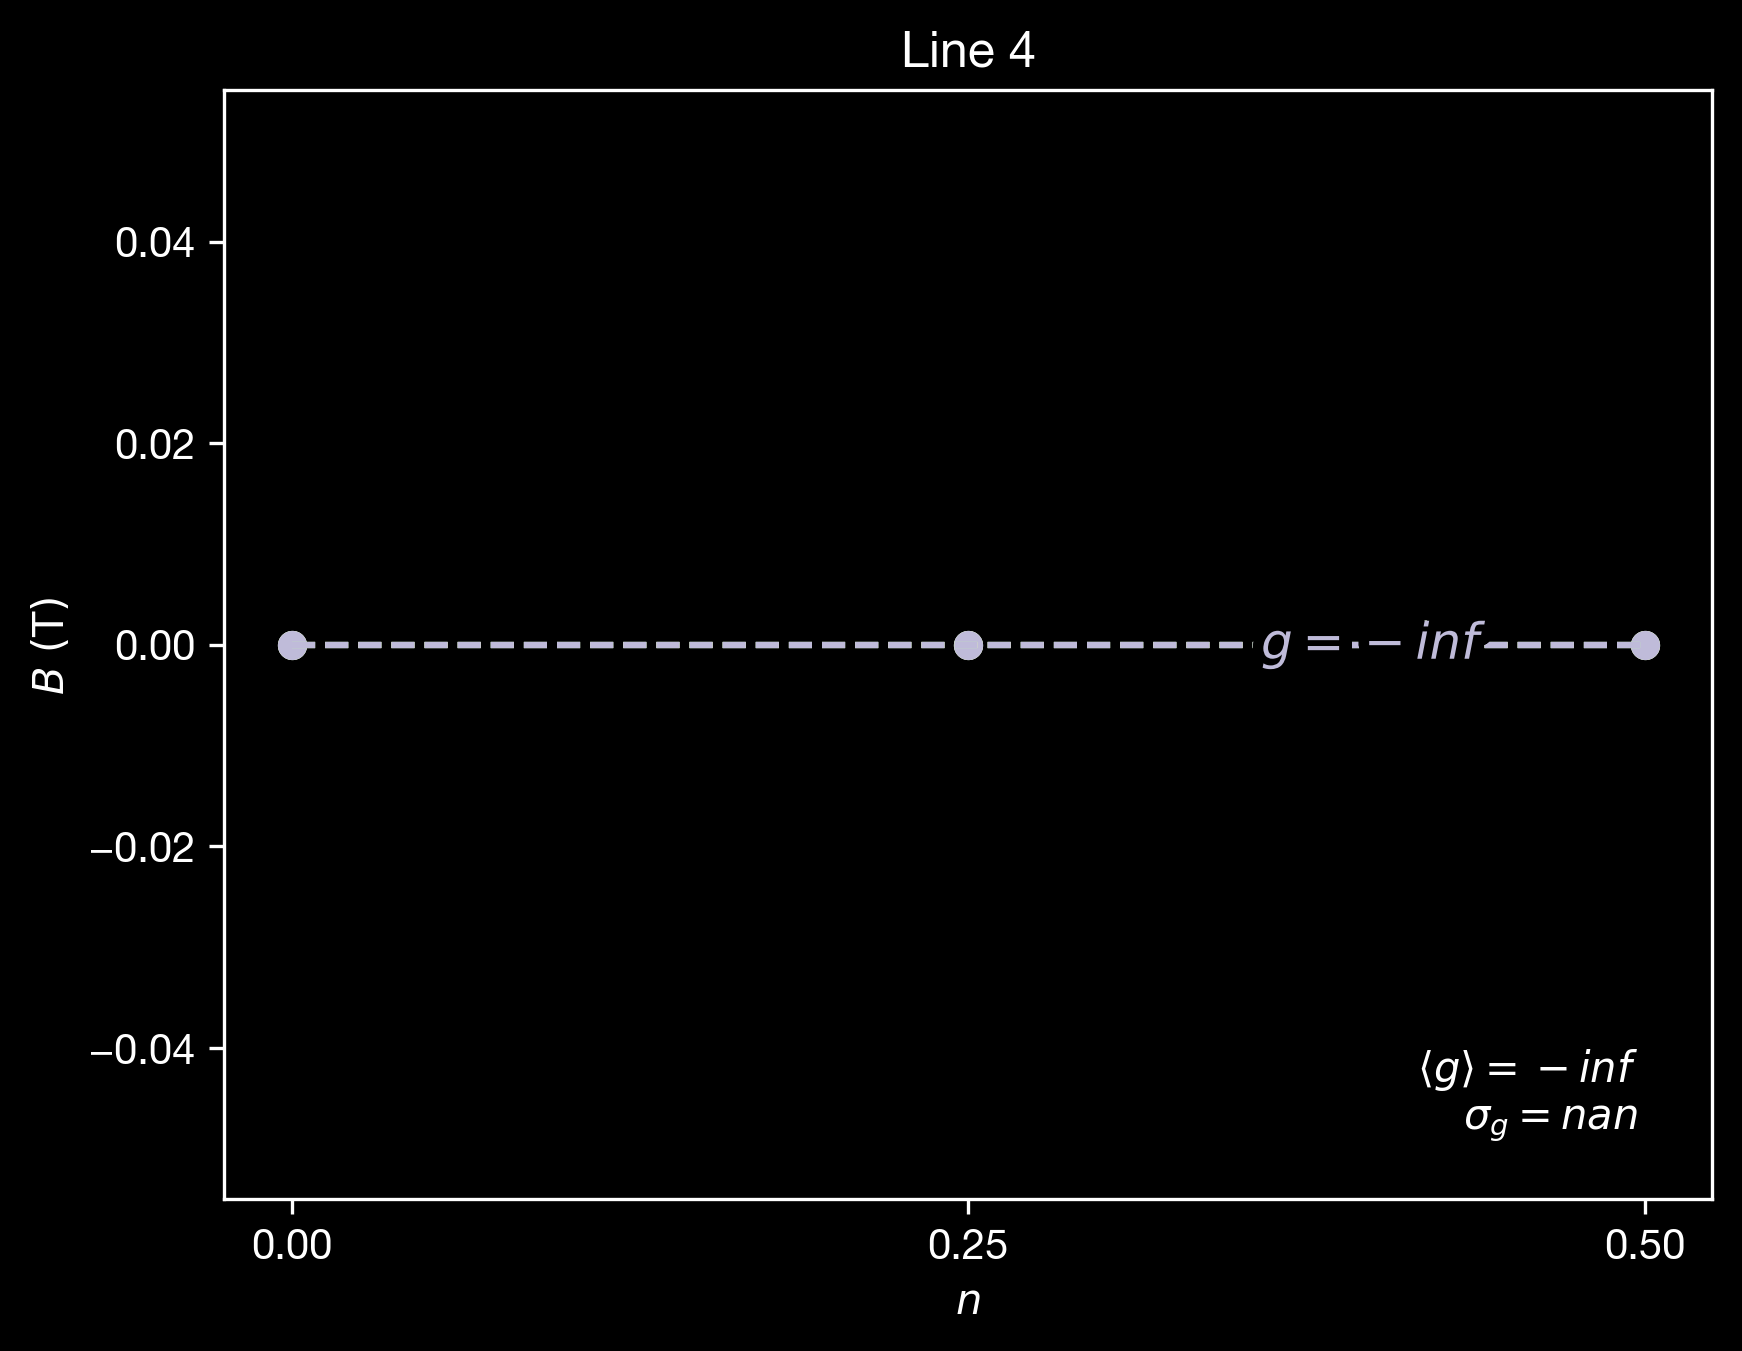

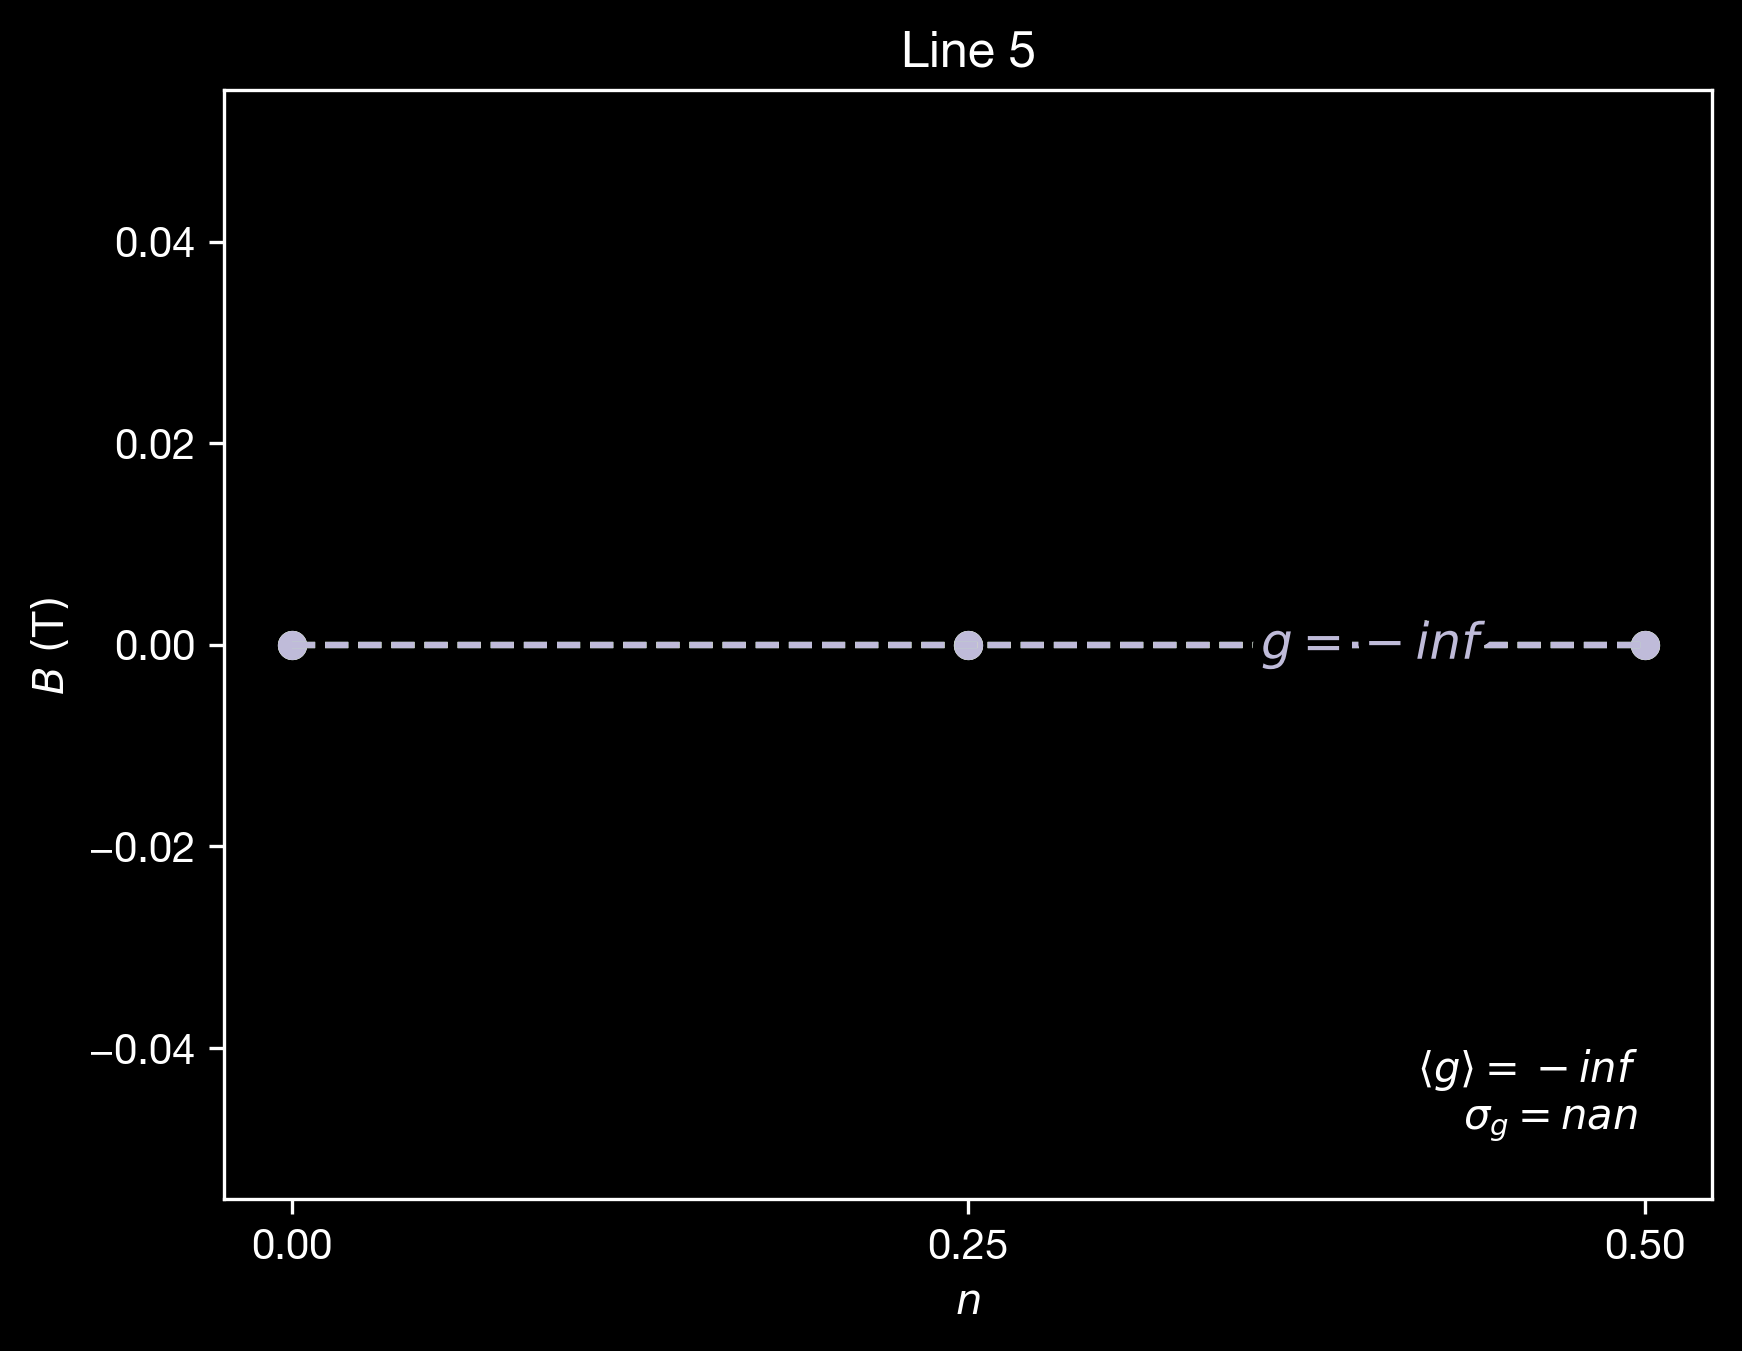

In [6]:
from labellines import labelLines

plt.rcParams['figure.dpi'] = 300

def make_plot_with_fits(df, line):
    df = df[df['line'] == line]
    g_factors = []
    for run in df['run'].unique():
        plt.scatter(data=df[df['run'] == run], x='n', y='B', label='_nolegend_')
        popt, pcov = get_fit_line_params(df, line, run)
        x = np.linspace(df['n'].min(), df['n'].max(), 100)
        y = linear(x, *popt)
        g = get_g_factor(df, line, run)
        g_factors.append(g)
        fit_line = plt.plot(x, y, '--', label=f'$g = {g:.2f}$')

    mean_g = np.mean(g_factors)
    std_g = np.std(g_factors)
    legend_text = f'$\\langle{{}} g\\rangle{{}} = {mean_g:.2f}$\n$\\sigma_g = {std_g:.2f}$'
    plt.text(0.95, 0.05, legend_text, transform=plt.gca().transAxes, ha='right', va='bottom')
    
    labelLines(plt.gca().get_lines(), fontsize=12, xvals=[0.4, 0.4, 0.4])
    plt.xticks(np.arange(df['n'].min(), df['n'].max() + 0.25, 0.25))
    plt.title(f'Line {line}')
    plt.xlabel('$n$')
    plt.ylabel(r'$B\ (\mathrm{T})$')
    plt.show()

for line in df['line'].unique():
    make_plot_with_fits(df, line)
